In [2]:
import pandas as pd
import matplotlib.pyplot as plt

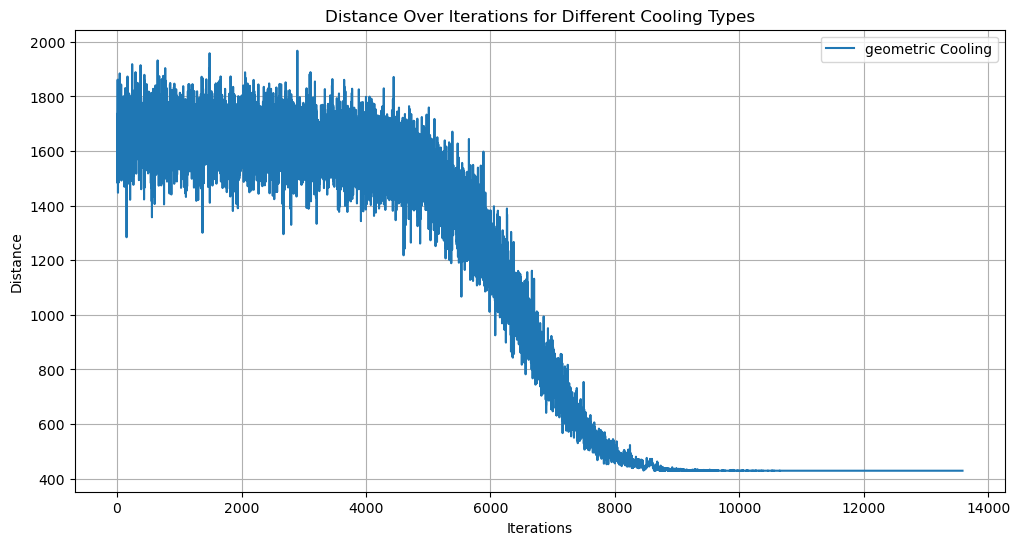

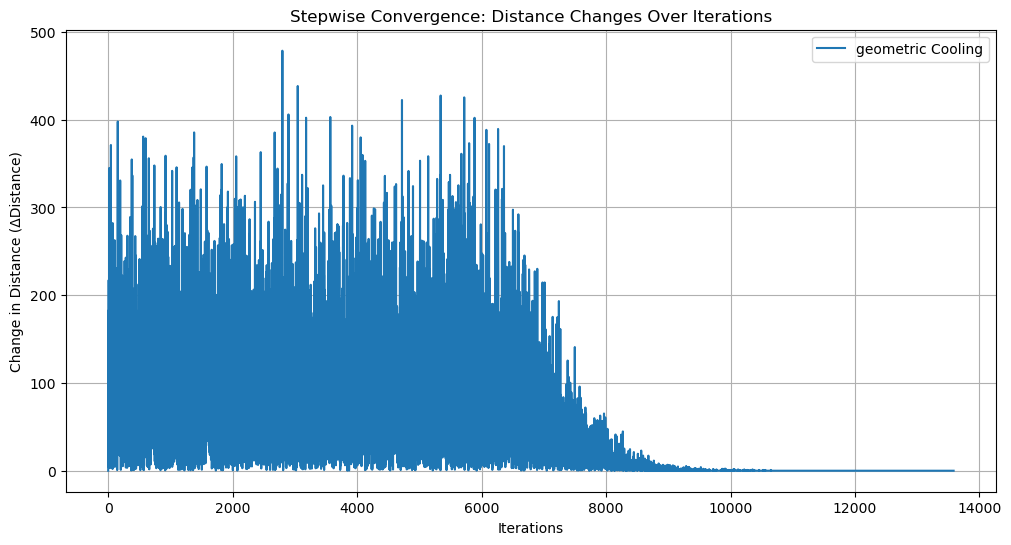

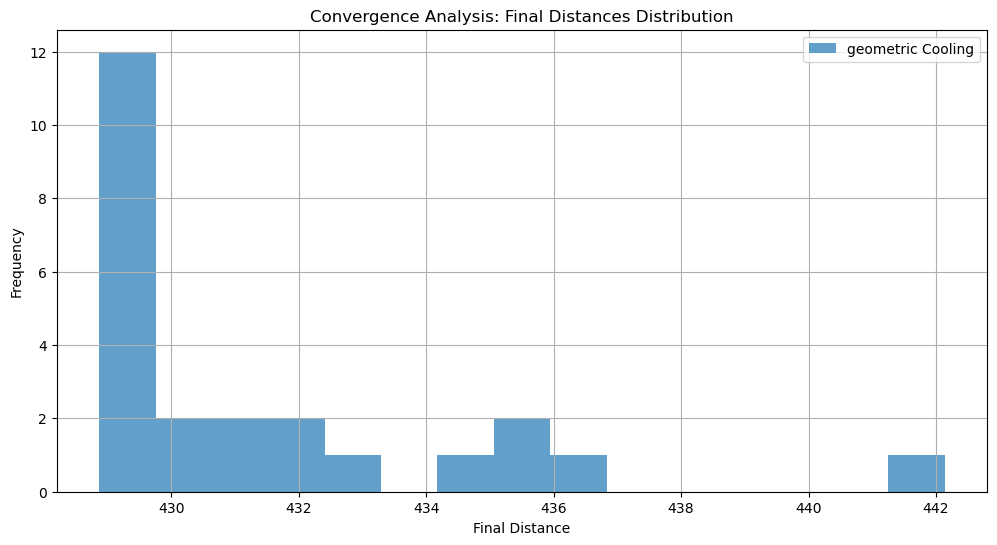

In [15]:
# Convert 'Distances' and 'Temperatures' from string to list (manual parsing)
df['Distances'] = df['Distances'].str.strip("[]").str.split(", ").apply(lambda x: list(map(float, x)))
df['Temperatures'] = df['Temperatures'].str.strip("[]").str.split(", ").apply(lambda x: list(map(float, x)))

# Plotting Distance Over Iterations
plt.figure(figsize=(12, 6))

# Plot for each cooling type
cooling_types = df['Cooling Type'].unique()
for cooling_type in cooling_types:
    subset = df[df['Cooling Type'] == cooling_type]
    avg_distances = pd.DataFrame(subset['Distances'].tolist()) # Average distances across runs
    avg_distances = avg_distances.loc[1]
    # avg_distances = pd.DataFrame(subset['Distances'].tolist().mean()
    plt.plot(avg_distances, label=f'{cooling_type} Cooling')

plt.title('Distance Over Iterations for Different Cooling Types')
plt.xlabel('Iterations')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)
plt.show()

# Convergence Plot: Stepwise Change in Distance
plt.figure(figsize=(12, 6))

for cooling_type in cooling_types:
    subset = df[df['Cooling Type'] == cooling_type]
    #avg_distances = pd.DataFrame(subset['Distances'].tolist()).mean()  # Average distances across runs
    avg_distances = pd.DataFrame(subset['Distances'].tolist()) # Average distances across runs
    avg_distances = avg_distances.loc[1]
    stepwise_changes = abs(avg_distances.diff().fillna(0))  # Calculate stepwise change (distance[i] - distance[i-1])
    plt.plot(stepwise_changes, label=f'{cooling_type} Cooling')

plt.title('Stepwise Convergence: Distance Changes Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Change in Distance (ΔDistance)')
plt.legend()
plt.grid(True)
plt.show()

# Convergence Analysis
plt.figure(figsize=(12, 6))

# Plot convergence for each cooling type
for cooling_type in cooling_types:
    subset = df[df['Cooling Type'] == cooling_type]
    final_distances = subset['Distances'].apply(lambda x: x[-1])  # Get the final distance for each run
    plt.hist(final_distances, bins=15, alpha=0.7, label=f'{cooling_type} Cooling')

plt.title('Convergence Analysis: Final Distances Distribution')
plt.xlabel('Final Distance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
